In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [24]:
df=pd.read_csv("C:\\Users\\Dev Atul Patel\\OneDrive\\Documents\\language_dataset.csv")
df

,text,language
0,AZ SAM UCHITEL,bulgarian
1,IVAN E LEKAR,bulgarian
2,TOVA E KASHTA,bulgarian
3,ONOVA E MAGAZIN,bulgarian
4,AZ SAM STROG UCHITEL,bulgarian
...,...,...
805,QUANDO O CARRO DELES CHEGA,portuguese
806,QUANDO CHEGA A MOTO,portuguese
807,ONDE FICA A CATEDRAL,portuguese
808,ONDE E O PARQUE,portuguese


<AxesSubplot: xlabel='language', ylabel='count'>

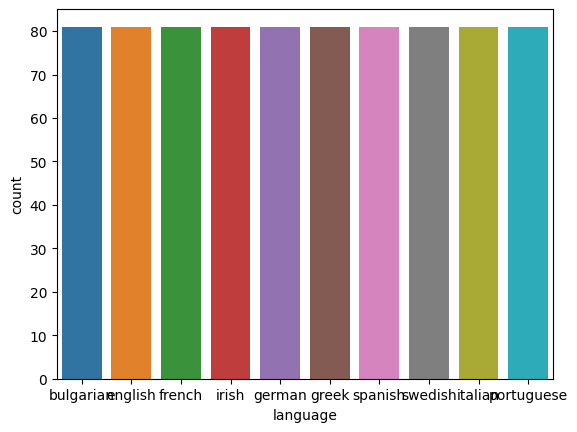

In [46]:
sns.countplot(x='language',data=df)

In [19]:
df.language.unique()

array(['bulgarian', 'english', 'french', 'irish', 'german', 'greek',
       'spanish', 'swedish', 'italian', 'portuguese'], dtype=object)

In [21]:
df.shape

(810, 2)

In [22]:
df.isna().sum()

text        0
language    0
dtype: int64

In [26]:
df['language'].value_counts()

bulgarian     81
english       81
french        81
irish         81
german        81
greek         81
spanish       81
swedish       81
italian       81
portuguese    81
Name: language, dtype: int64

In [37]:
x=np.array(df['text'])
y=np.array(df['language'])

cv=CountVectorizer()
X=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=41)

In [38]:
model=MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9835390946502057

In [41]:
pred=model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

   bulgarian       0.89      1.00      0.94        17
     english       1.00      1.00      1.00        13
      french       1.00      1.00      1.00        19
      german       1.00      0.97      0.99        34
       greek       1.00      1.00      1.00        25
       irish       1.00      1.00      1.00        23
     italian       1.00      0.96      0.98        27
  portuguese       0.96      0.96      0.96        24
     spanish       0.97      0.97      0.97        32
     swedish       1.00      1.00      1.00        29

    accuracy                           0.98       243
   macro avg       0.98      0.99      0.98       243
weighted avg       0.98      0.98      0.98       243



In [48]:
cf=confusion_matrix(y_test,pred)
cf

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

<AxesSubplot: >

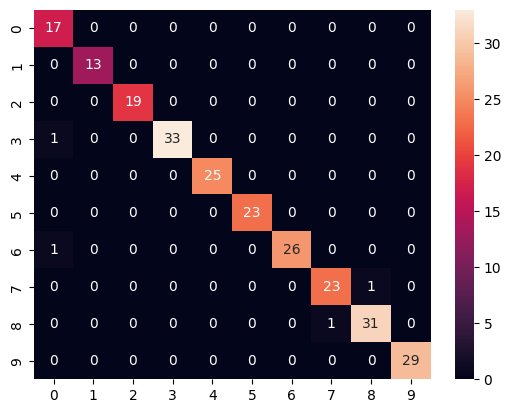

In [49]:
sns.heatmap(cf,annot=True)

In [57]:
user=input("enter sentence: ")
new=np.array([user])
df=cv.transform(new)
output=model.predict(df)
print(output)

enter sentence: Hur mår du? Hur är det ? Läget? Och med dig?
['swedish']
